<a href="https://colab.research.google.com/github/ceyhun2306/Data-Analysis/blob/main/data_analysing/Airlines_Flights_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
#!/bin/bash
!kaggle datasets download aleydx/airlines-flights-data

Dataset URL: https://www.kaggle.com/datasets/aleydx/airlines-flights-data
License(s): apache-2.0
  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 710MB/s]


In [8]:
!unzip/content/airlines-flights-data.zip

/bin/bash: line 1: unzip/content/airlines-flights-data.zip: No such file or directory


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/airlines-flights-data.zip")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [13]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [14]:
df.shape

(300153, 12)

In [15]:
df.isna().sum()

,0
index,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [23]:
df["flight"].value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
6E-2914,1
G8-107,1
SG-9974,1


In [24]:
df["source_city"].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [25]:
df["destination_city"].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [26]:
df["airline"].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


#Q.1. What are the airlines in the dataset, accompanied by their frequencies and prices?

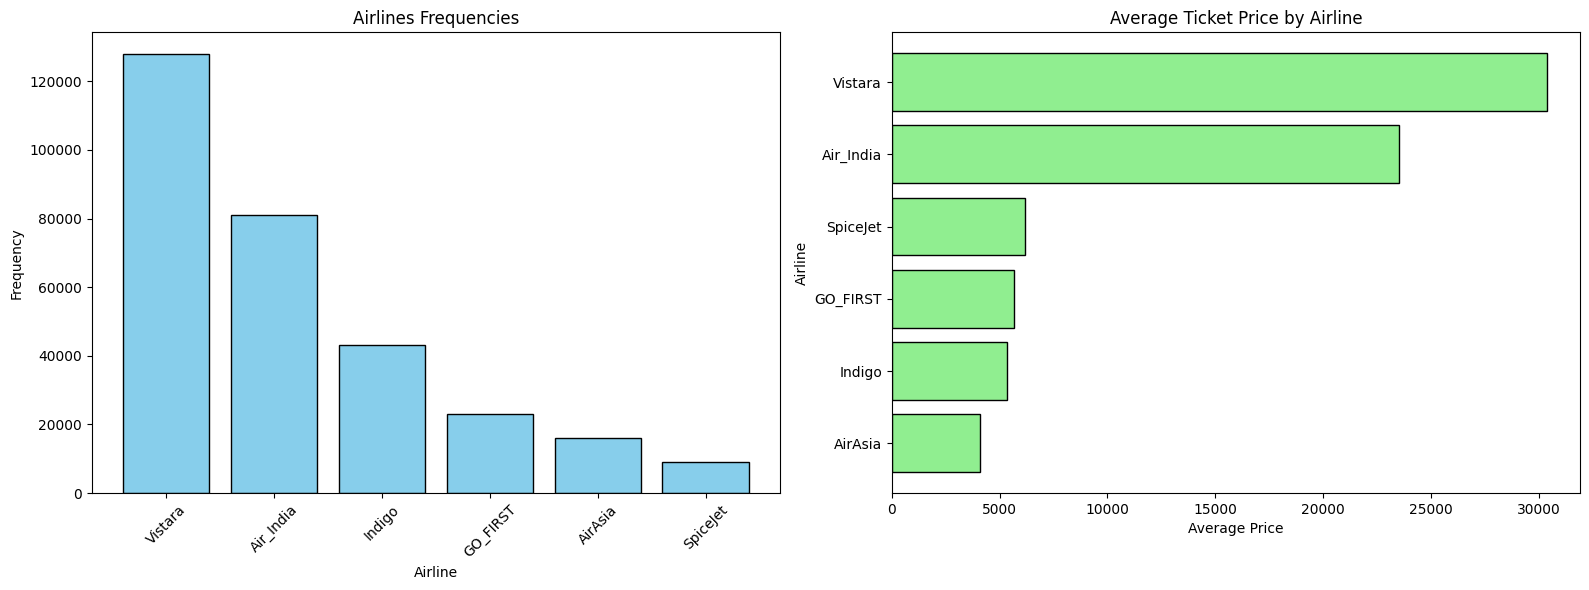

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

airline_counts = df['airline'].value_counts()
bars1 = axes[0].bar(airline_counts.index, airline_counts.values, color='skyblue', edgecolor='black')
axes[0].set_title("Airlines Frequencies")
axes[0].set_xlabel("Airline")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45)



avg_price = df.groupby("airline")["price"].mean().sort_values()
bars2 = axes[1].barh(avg_price.index, avg_price.values, color='lightgreen', edgecolor='black')
axes[1].set_title("Average Ticket Price by Airline")
axes[1].set_xlabel("Average Price")
axes[1].set_ylabel("Airline")


plt.tight_layout()
plt.show()


###From the bar chart, it can be seen that the most frequently used airline is **Vistara**, followed by **Air India**, **IndiGo**, and the least used is **SpiceJet**. Despite **Vistara** being in the top 1 and **Air India** in the top 2, their prices are relatively higher compared to the others. Looking at the remaining airlines, **SpiceJet** is actually more expensive than the other three but is used less frequently, which indicates that its prices should perhaps be slightly lower.


#Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.

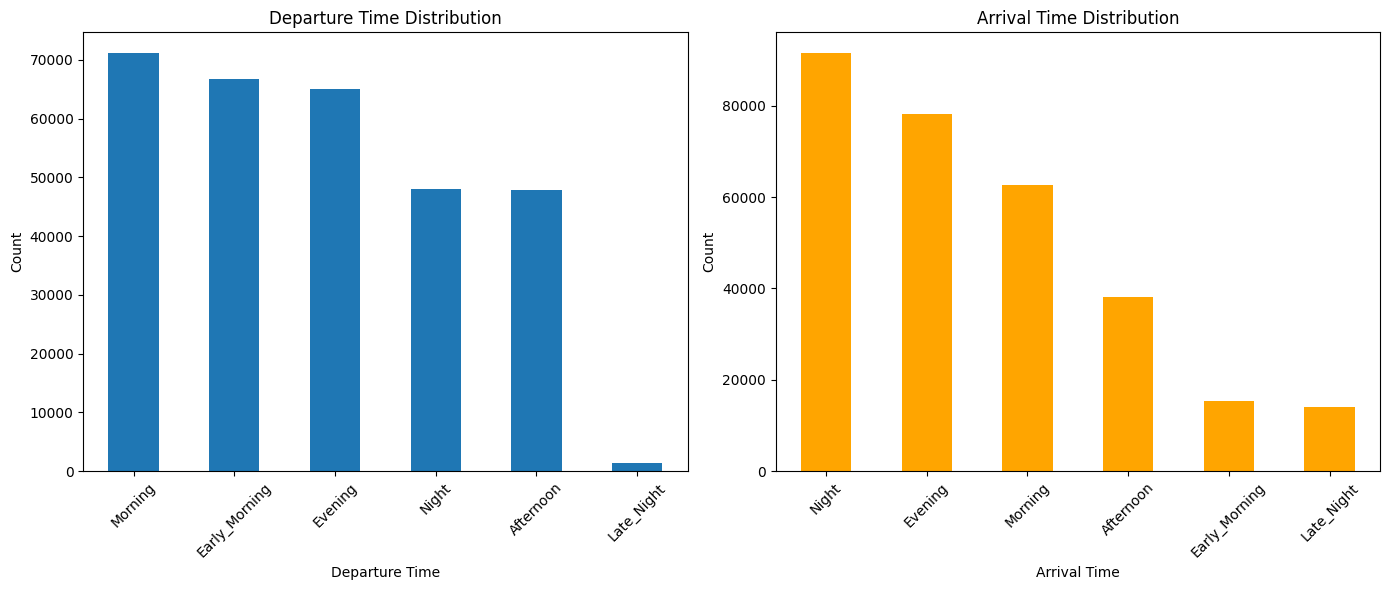

In [ ]:
departure_counts = df['departure_time'].value_counts()
arrival_counts = df['arrival_time'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

departure_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title("Departure Time Distribution")
axes[0].set_xlabel("Departure Time")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

arrival_counts.plot(kind='bar', ax=axes[1], color="orange")
axes[1].set_title("Arrival Time Distribution")
axes[1].set_xlabel("Arrival Time")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


###Looking at the difference between **departure time** and **arrival time**, we can see that people mostly prefer to leave the country **early in the morning** or **in the evening**. During these times, they usually arrive **at night** or **late evening**. However, the number of people who choose **midnight departures** is significantly lower than those who travel at other times, especially compared to the next least popular time, **afternoon**. This shows that very few people prefer to travel at midnight.


#Q.3. Show Bar Graphs representing the Source City & Destination City.

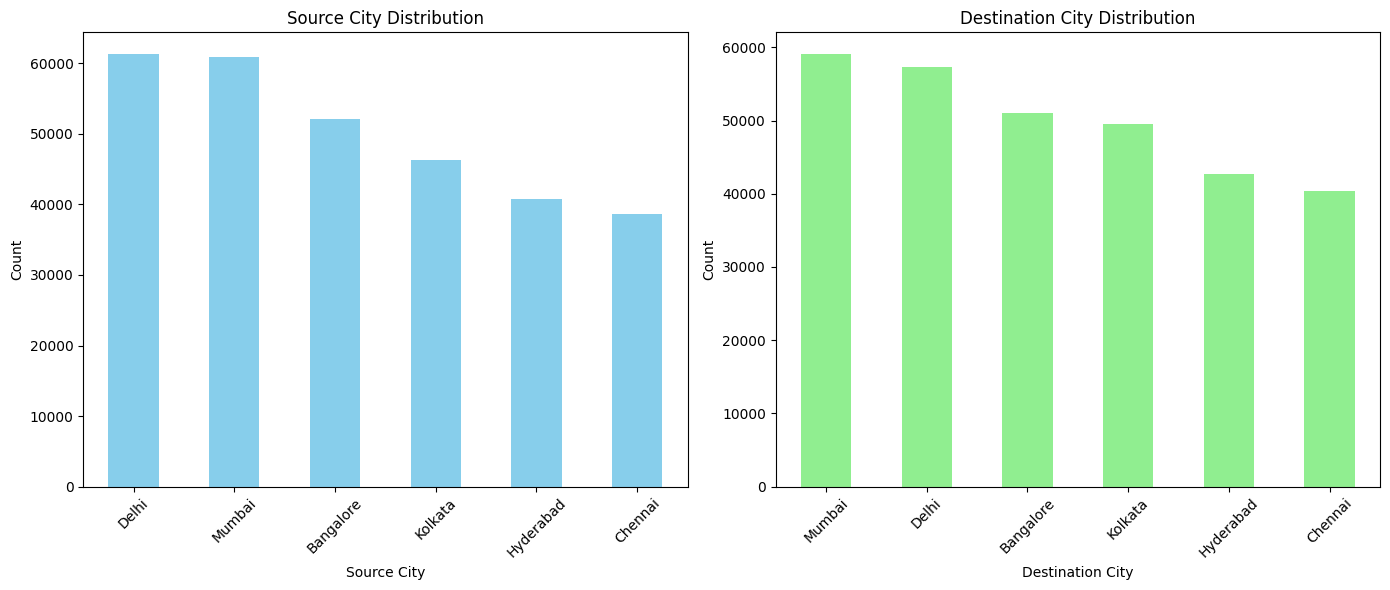

In [ ]:


source_counts = df['source_city'].value_counts()
destination_counts = df['destination_city'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14,6))

source_counts.plot(kind='bar', ax=axes[0], color="skyblue")
axes[0].set_title("Source City Distribution")
axes[0].set_xlabel("Source City")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)

destination_counts.plot(kind='bar', ax=axes[1], color="lightgreen")
axes[1].set_title("Destination City Distribution")
axes[1].set_xlabel("Destination City")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


###From this, it is clear that people mostly prefer to travel **between Delhi and Mumbai**, followed by **Bangalore** and then **Kolkata**. However, there are some cities where the number of people leaving is high, but the number of people arriving is low, or even negative. In general, for each city, the difference between the number of people **departing** and **arriving** is quite small.


#Does ticket price change based on the departure time and arrival time?

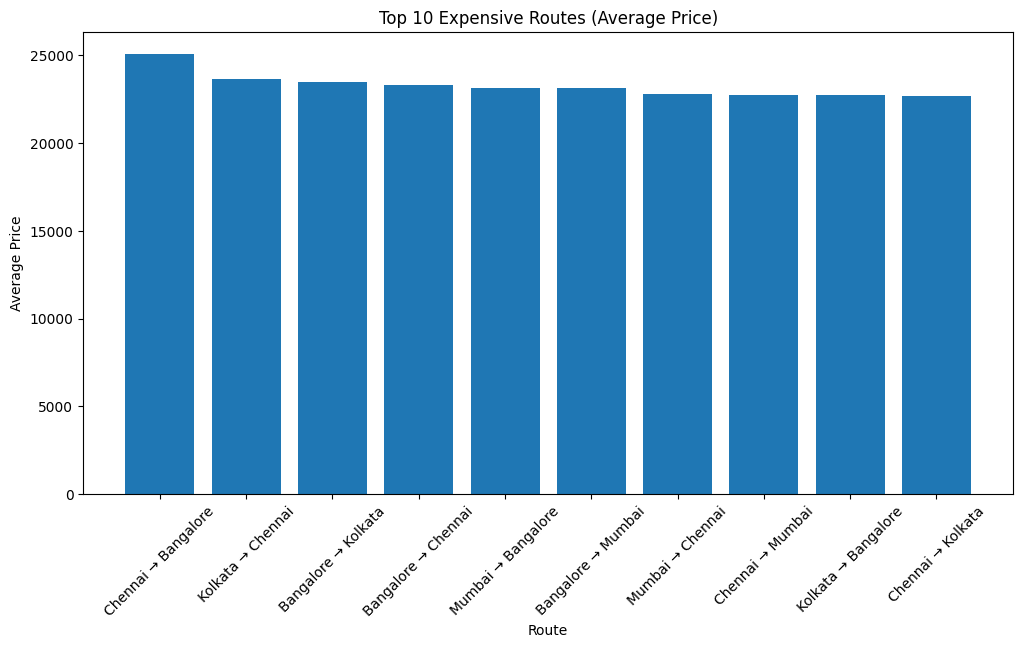

In [ ]:
route_prices = df.groupby(["source_city", "destination_city"])["price"].mean().reset_index()

route_prices["route"] = route_prices["source_city"] + " → " + route_prices["destination_city"]

top_routes = route_prices.sort_values("price", ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.bar(top_routes["route"], top_routes["price"])
plt.title("Top 10 Expensive Routes (Average Price)")
plt.xlabel("Route")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


###Although there is no significant difference between flight ticket prices overall, **flights from Chennai to Bangalore** are more expensive than usual. The reason for this is the relatively long distance between the two cities. Looking at the rest of the top 9 most expensive routes, their prices are very close to each other, with no major differences in between.


#How is the price affected when tickets are bought in just 1 or 2 days before departure?

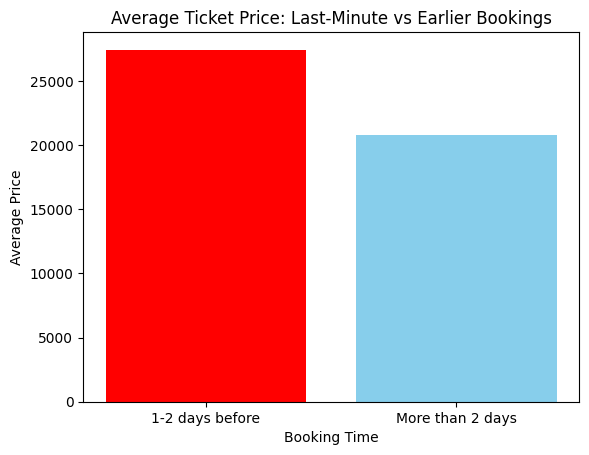

In [ ]:
def mark_last_minute(x):
    if x <= 2:
        return "1-2 days before"
    else:
        return "More than 2 days"


df["last_minute"] = df["days_left"].apply(mark_last_minute)

avg_prices = df.groupby("last_minute")["price"].mean()

plt.bar(avg_prices.index, avg_prices.values, color=["red","skyblue"])
plt.title("Average Ticket Price: Last-Minute vs Earlier Bookings")
plt.xlabel("Booking Time")
plt.ylabel("Average Price")
plt.show()


###Looking closely, we can see that, although not very large, there is a noticeable difference: when people buy tickets **1–2 days before departure**, prices can exceed **25,000**, whereas buying earlier, the price is around **20,000 or less**. Therefore, it is recommended that passengers purchase their tickets at least **a week in advance**.


#Q.8. How does the ticket price vary between Economy and Business class?`

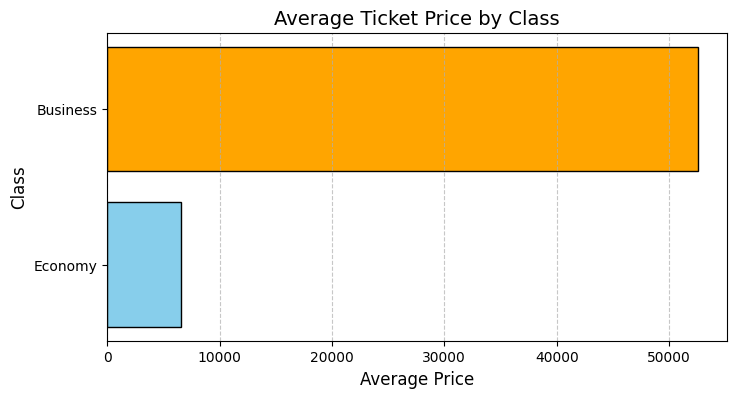

In [ ]:
avg_price = df.groupby("class")["price"].mean().sort_values()


plt.figure(figsize=(8,4))
plt.barh(avg_price.index, avg_price.values, color=["skyblue", "orange"], edgecolor="black")

plt.title("Average Ticket Price by Class")
plt.xlabel("Average Price")
plt.ylabel("Class")


plt.show()


###Looking at the price difference between **Business class** and **Economy class**, we can see that the gap is quite large. In fact, even **half of the average Business class prices** are still higher than Economy class fares. This clearly shows how much more people spend when choosing Business class.


#Relationship between departure time and price

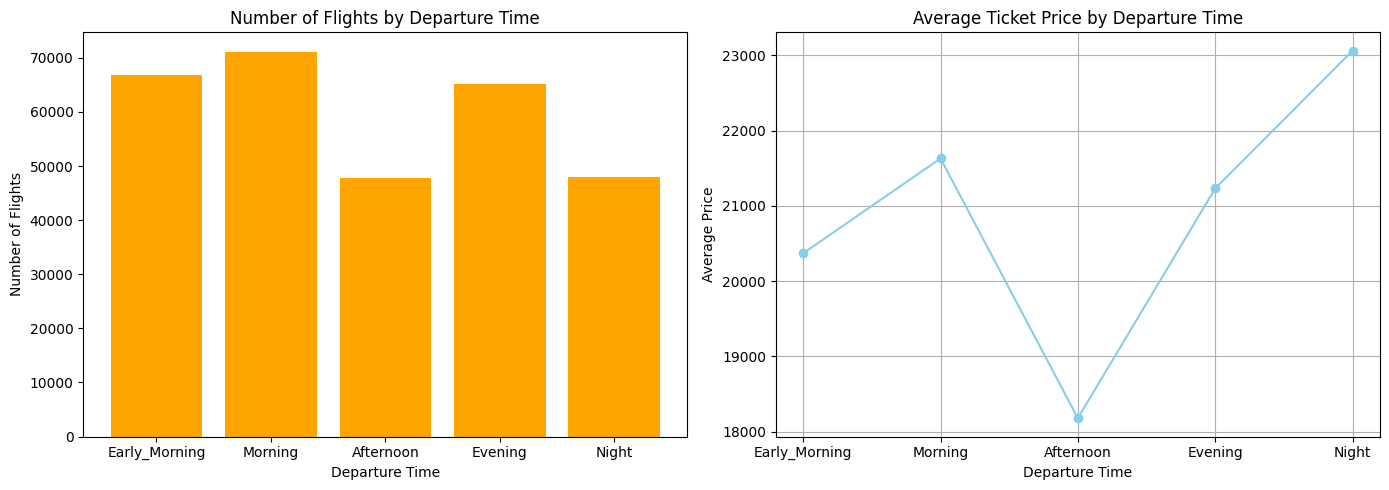

In [34]:
avg_price_by_time = df.groupby("departure_time")["price"].mean().reindex([
    "Early_Morning", "Morning", "Afternoon", "Evening", "Night"
])

count_by_time = df["departure_time"].value_counts().reindex([
    "Early_Morning", "Morning", "Afternoon", "Evening", "Night"
])

fig, axes = plt.subplots(1, 2, figsize=(14,5))

axes[0].bar(count_by_time.index, count_by_time.values, color='orange')
axes[0].set_title("Number of Flights by Departure Time")
axes[0].set_xlabel("Departure Time")
axes[0].set_ylabel("Number of Flights")

axes[1].plot(avg_price_by_time.index, avg_price_by_time.values, marker='o', linestyle='-', color='skyblue')
axes[1].set_title("Average Ticket Price by Departure Time")
axes[1].set_xlabel("Departure Time")
axes[1].set_ylabel("Average Price")
axes[1].grid(True)

plt.tight_layout()
plt.show()


###It can be seen here that the number of **midnight departures** is very low. At first glance, it might seem that the reason is the high prices. However, looking again at the visuals, we see that **afternoon departures** have much lower prices, yet the number of flights departing at midnight is still the same. This indicates that the number of departures is **not driven by price**.


#The number of stops differs from each other by how much?


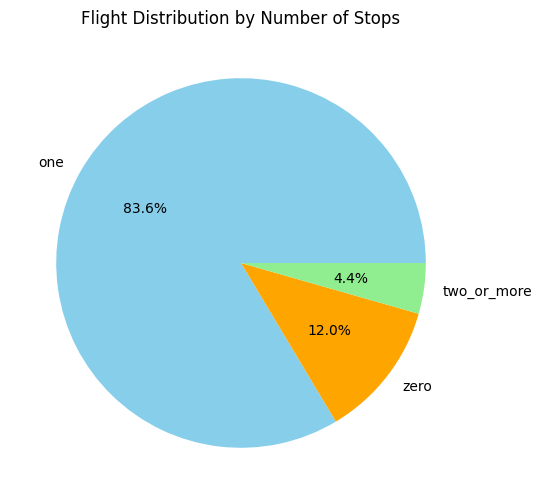

In [37]:
stops_counts = df['stops'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(stops_counts.values, labels=stops_counts.index, autopct='%1.1f%%', colors=['skyblue','orange','lightgreen'])
plt.title("Flight Distribution by Number of Stops")
plt.show()


###It can be seen here that in most cases, there are rarely 2 or more stops. However, looking at the difference between **making one stop** and **no stops**, we can see that the number of flights with **one stop** is higher than those with **no stops**.


#The differences between the top 5 flights.


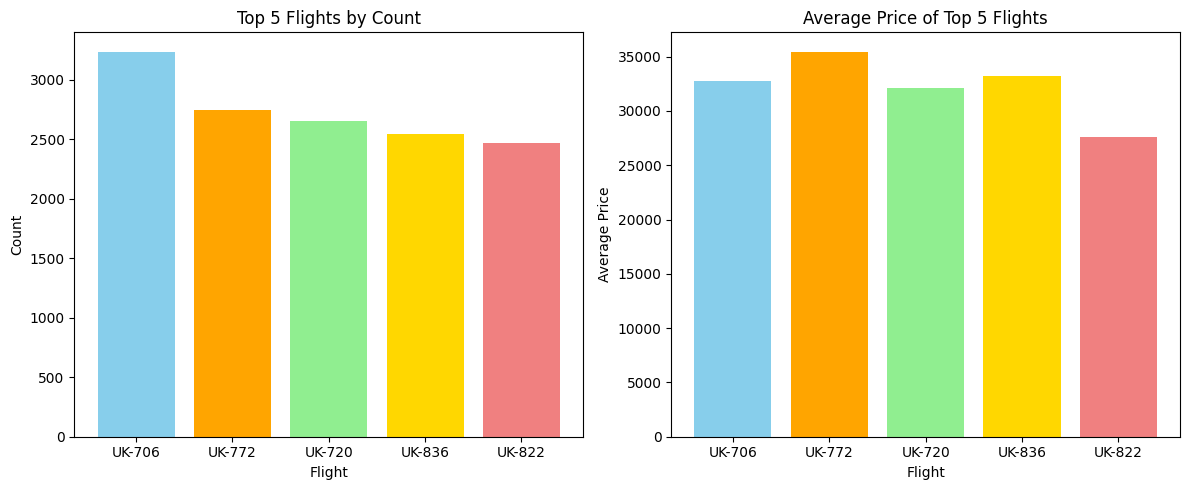

In [40]:
top5 = df['flight'].value_counts().nlargest(5)
flights = top5.index
colors = ['skyblue','orange','lightgreen','gold','lightcoral']

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(flights, top5.values, color=colors)
plt.title("Top 5 Flights by Count")
plt.xlabel("Flight")
plt.ylabel("Count")

avg_price = df[df['flight'].isin(flights)].groupby('flight')['price'].mean().reindex(flights)
plt.subplot(1,2,2)
plt.bar(flights, avg_price.values, color=colors)
plt.title("Average Price of Top 5 Flights")
plt.xlabel("Flight")
plt.ylabel("Average Price")

plt.tight_layout()
plt.show()


###It can be seen here that **UK-706** is the most used flight, followed by **UK-772**. Looking at the price difference, **UK-706** is cheaper, which explains why it is more popular. Meanwhile, **UK-772** has the highest prices, yet it is still the second most used flight, which indicates its quality or appeal. However, when it comes to **UK-822**, both in terms of price and usage, it lags behind the others, showing that it is not as effective or preferred.
